<a href="https://colab.research.google.com/github/Rogerio-mack/IA/blob/main/perceptron_gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 





# Backpropagation e Derivadas: um exemplo de aproximação linear

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def f(x, w0, w1):
  return w0 + w1*x

def print_data(x=[],y=[],y_pred=None,error=None):
  if y_pred is None:
    display(pd.DataFrame({'x':x,'y':y}))
  if y_pred is not None:
    display(pd.DataFrame({'x':x,'y':y,'y_pred':y_pred,'error':error}))
  return

In [25]:
x = np.arange(-5,5,1)
y = f(x, 3, 2)

print_data(x,y)

,x,y
0,-5,-7
1,-4,-5
2,-3,-3
3,-2,-1
4,-1,1
5,0,3
6,1,5
7,2,7
8,3,9
9,4,11


# Descida do Gradiente: Caso Linear

A ideia por trás do métodos de descida do gradiente como também do Backpropagation é minimizarmos uma função de custo, em geral uma função. Por exemplo podemos querer minimizar o erro quadrático médio (MSE). 

$$ MSE = \frac{1}{n} \sum_{i = 1}^{n} (y_i - \hat{y_i})^2 $$

Neste exemplo vamos assumir um modelo linear  $\hat{y_i} = w_1 x_i + w_0$ para nosso único neurônio e vamos entender como a descida do gradiente permite encontrar os valores $w_0$ e $w_1$ que minimizam o erro.  

# Derivadas Parciais

Nossa função erro é agora da forma:

$$ f(w_0,w_1) = \frac{1}{n} \sum_{i = 1}^{n} (y_i - (w_1 x_i + w_0)) ^ 2 $$

e para obtermos os valores de $w_0$ e $w_1$ que minimizam essa função podemos empregar as derivadas com relação $w_0$ e $w_1$ (derivadas parciais). 

Aplicando a regra da cadeia, 

$$ \frac{d f(g (x))}{dx} = f'(g (x)) g (x) ' $$

Obtemos, 

$$ \frac{\partial f(w_0,w_1)}{\partial w_0} = \frac{1}{n} \sum_{i = 1}^{n} -2 (y_i - (w_1 x_i + w_0)) $$

e

$$ \frac{\partial f(w_0,w_1)}{\partial w_1} = \frac{1}{n} \sum_{i = 1}^{n} -2x_i (y_i - (w_1 x_i + w_0)) $$


Note a diferença, havendo o produto por $x_i$ somente na primeira derivada. E ainda podemos escrever:

$$ \frac{\partial f(w_0,w_1)}{\partial w_0} = \frac{1}{n} \sum_{i = 1}^{n} -2 (y_i - \hat{y_i}) $$

$$ \frac{\partial f(w_0,w_1)}{\partial w_1} = \frac{1}{n} \sum_{i = 1}^{n} -2x_i (y_i - \hat{y_i}) $$

Os pesos podem então ser ajustados da seguinte forma (aprendizado do perceptron):

$$ w_0 = w_0 + \eta \frac{\partial f(w_0,w_1)}{\partial w_0} $$
$$ w_1 = w_1 + \eta \frac{\partial f(w_0,w_1)}{\partial w_1} $$

Ou ainda, para cada $i$,

$$ w_0 = w_0 - \eta . 2 \hat{y_i} = w_0 - \lambda (y_i - \hat{y_i})$$
$$ w_1 = w_1 - \eta . 2 x_i \hat{y_i} = = w_1 - \lambda x_i (y_i - \hat{y_i})$$

É isso que faremos para ajustar sucessivamente os pesos e chegar aos valores de $w_0$ e $w_1$ que minimizam a função.

A descida do gradiente é um processo iterativo que a cada iteração (epoch) minimizamos ligeiramente o MSE atualizando os pesos com base nessas derivadas. Você não precisa saber todos os detalhes desse cálculo. O importante é que você entenda que:

> **Os métodos de descida do gradiente, assim como o Backpropagation, são um processo que emprega as derivadas de uma função custo (o erro) para repetidamente ajustar os pesos de uma rede neural e minimizar o erro (o custo).**




In [34]:
w0 = 1
w1 = 1
mu = 0.2
max_it = 10
erro_hist = []

for it in range(max_it):
  for i in range(len(x)):

    y_pred = f(x[i],w0,w1)
  
    dE = (y[i] - y_pred)
    
    w0 = w0 + mu*dE
    w1 = w1 + mu*dE*x[i]
 
  erro_hist.append( np.mean( ( y - f(x,w0,w1) )**2 ) )

  print('w0 = ', w0, ' w1 = ', w1)



w0 =  2.6503523328  w1 =  2.1479278592
w0 =  2.8943274479085472  w1 =  2.044707618192537
w0 =  2.9680630265462815  w1 =  2.013511796461186
w0 =  2.990347822086281  w1 =  2.00408361373273
w0 =  2.997082862638405  w1 =  2.0012341734991357
w0 =  2.99911836577584  w1 =  2.0003729990948353
w0 =  2.99973354737578  w1 =  2.0001127299564017
w0 =  2.9999194711377934  w1 =  2.0000340699032426
w0 =  2.999975662098779  w1 =  2.0000102968043616
w0 =  2.999992644457904  w1 =  2.0000031119601145


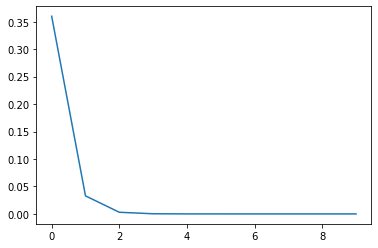

In [32]:
plt.plot(erro_hist)
plt.show()